### Importacion de Modulos

In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re  
import unicodedata

### Analisis de tabla PurchasePrices

In [491]:
purchasePrices = pd.read_csv('PurchasePricesDec.csv')
purchasePrices.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


#### Identificar tipos de datos

In [492]:
# Revisar los tipos de datos para cada tabla
purchasePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


#### Modificar tipo de dato

In [493]:
# Función para unificar tipos de datos en un DataFrame
def unify_column_types(purchasePrices):
    # Convertir columnas numéricas a tipos consistentes
    for col in purchasePrices.select_dtypes(include=['number']).columns:
        if purchasePrices[col].dtype == 'float64' and purchasePrices[col].dropna().apply(float.is_integer).all():
            # Convertir columnas flotantes que tienen solo valores enteros a int64
            purchasePrices[col] = purchasePrices[col].astype('int64')
        elif purchasePrices[col].dtype == 'int64':
            continue  # Mantener columnas que ya son int64
        else:
            purchasePrices[col] = purchasePrices[col].astype('float64')  # Asegurar columnas numéricas flotantes

    # Convertir columnas de texto a string
    string_columns = purchasePrices.select_dtypes(include=['object']).columns
    purchasePrices[string_columns] = purchasePrices[string_columns].astype('string')

    return purchasePrices

# Aplicar la función al DataFrame
purchasePrices = unify_column_types(purchasePrices)

# Verificar el resultado final
print("Tipos de datos después de unificar:")
print(purchasePrices.dtypes)

# Mostrar las primeras filas
print(purchasePrices.head())

Tipos de datos después de unificar:
Brand                      int64
Description       string[python]
Price                    float64
Size              string[python]
Volume            string[python]
Classification             int64
PurchasePrice            float64
VendorNumber               int64
VendorName        string[python]
dtype: object
   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP           

In [494]:
# Función para limpiar strings
def clean_string(s):
    if pd.isnull(s):  # Si es nulo, lo devuelve tal cual
        return s
    # Eliminar acentos y normalizar el texto
    s = unicodedata.normalize('NFKD', s).encode('ascii', 'ignore').decode('utf-8')
    # Convertir a minúsculas, quitar espacios al inicio/final y reemplazar múltiples espacios
    return ' '.join(s.strip().lower().split())

# Convertir columnas de tipo object a string y limpiarlas
purchasePrices = purchasePrices.convert_dtypes()  # Cambiar a tipos más apropiados
string_columns = purchasePrices.select_dtypes(include=['string', 'object']).columns

for col in string_columns:
    purchasePrices[col] = purchasePrices[col].apply(clean_string)

# Reemplazar valores "Unknown" y pd.NA en Volume por NaN y convertirla a float
purchasePrices['Volume'] = purchasePrices['Volume'].replace(["unknown", pd.NA], np.nan).astype(float)

# Asegurarse de que todas las columnas de tipo object se conviertan a string
string_columns = purchasePrices.select_dtypes(include=['object']).columns
purchasePrices[string_columns] = purchasePrices[string_columns].astype('string')

# Verificar los resultados finales
print("Primeras filas después de limpiar las columnas de tipo string:")
print(purchasePrices.head())
print("Tipos de datos después de la conversión a string:")
print(purchasePrices.dtypes)


Primeras filas después de limpiar las columnas de tipo string:
   Brand                  Description  Price   Size  Volume  Classification  \
0     58  gekkeikan black & gold sake  12.99  750ml   750.0               1   
1     62     herradura silver tequila  36.99  750ml   750.0               1   
2     63   herradura reposado tequila  38.99  750ml   750.0               1   
3     72         no. 3 london dry gin  34.99  750ml   750.0               1   
4     75    three olives tomato vodka  14.99  750ml   750.0               1   

   PurchasePrice  VendorNumber                  VendorName  
0           9.28          8320     shaw ross int l imp ltd  
1          28.67          1128           brown-forman corp  
2          30.46          1128           brown-forman corp  
3          26.11          9165  ultra beverage company llp  
4          10.94          7245        proximo spirits inc.  
Tipos de datos después de la conversión a string:
Brand                      Int64
Description  

#### Analisis de columna 'Size' 

In [495]:
# Verificar valores únicos en Size
print(purchasePrices['Size'].unique())

<StringArray>
[      '750ml',      '1000ml',      '1750ml',        '50ml',       '375ml',
  '100ml 4 pk',   '50ml 5 pk',       '100ml',       '200ml',   '50ml 4 pk',
   '50ml 3 pk',       '300ml',  '200ml 4 pk',     'unknown',  '750ml 2 pk',
  '250ml 4 pk',      '1500ml',      '3000ml',      '5000ml',      '4000ml',
  '187ml 4 pk',       '150ml',       '187ml',       '500ml',       '720ml',
       '650ml',  '200ml 3 pk',  '187ml 3 pk',       '330ml',       '250ml',
  '750ml + 3/',     '18000ml',       '180ml',  '750ml + 4/',      '6000ml',
 '1000ml 2 pk',  '750ml 12 p',  '750ml 6 pk',   '20ml 5 pk',          <NA>,
  '375ml 2 pk',     '20000ml',  '50ml 12 pk',  '750ml 3 pk',  '375ml 3 pk',
  '750ml + 1/',  '200ml 5 pk',     '162.5ml',       '400ml',      '1100ml',
       '600ml',     '19500ml',       '560ml',      '3750ml',     '750ml 3',
      '9000ml']
Length: 56, dtype: string


La mayoría de los valores están en mililitros (ml).
Algunos tienen sufijos como pk para indicar paquetes.
Otros incluyen valores desconocidos (Unknown) o formatos adicionales (+ 3/)

#### Transformacion de columna size para obtener mL totales, paquetes (No use la columna de volumen porque no me indica correctamente cuando hay paquetes) 

In [496]:
# Función para procesar la columna 'Size'
def parse_size(size):
    if pd.isnull(size):  # Verificar si el valor es nulo
        return {"size_ml": np.nan, "pack_count": np.nan}  # Retorna valores nulos si el campo es vacío
    
    size = size.strip().lower()  # Elimina espacios al principio/final y convierte a minúsculas

    #################################################################################################
    # Manejar paquetes, como "100mL 4 Pk"
    # Busca coincidencias con el patrón (\d+(?:\.\d+)?)(ml|l) (\d+) pk
    #################################################################################################
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l) (\d+) pk", size)  # Buscar coincidencias con regex
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        pack_count = int(match.group(3))  # Número de botellas en el paquete
        return {"size_ml": unit_size, "pack_count": pack_count}

    #################################################################################################
    # Manejar tamaños con adicionales, como "750mL + 3/"
    #################################################################################################
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)(?: \+ (\d+)/)?", size)  # Buscar coincidencias con regex para valores con +
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        additional_count = int(match.group(3)) if match.group(3) else 0  # Ítems adicionales
        return {"size_ml": unit_size, "pack_count": 1 + additional_count}

    #################################################################################################
    # Manejar tamaños con número adicional separado por espacios, como "750mL  3"
    #################################################################################################
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)\s+(\d+)", size)  # Buscar coincidencias con espacios adicionales
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        pack_count = int(match.group(3))  # Número adicional
        return {"size_ml": unit_size, "pack_count": pack_count}

    #################################################################################################
    # Manejar tamaños individuales, como "750mL" o "162.5mL"
    #################################################################################################
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)", size)  # Busca tamaños individuales
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        return {"size_ml": unit_size, "pack_count": 1}

    #################################################################################################
    # Retornar valores nulos si el tamaño no coincide con ningún patrón conocido
    #################################################################################################
    return {"size_ml": np.nan, "pack_count": np.nan}

# Aplicar la función parse_size a la columna 'Size'
size_data = purchasePrices['Size'].apply(parse_size)

# Crear nuevas columnas en el DataFrame
purchasePrices['size_ml'] = size_data.apply(lambda x: x['size_ml'])
purchasePrices['pack_count'] = size_data.apply(lambda x: x['pack_count'])

# Verificar las primeras filas para confirmar resultados
print("Primeras filas del DataFrame después de procesar la columna 'Size':")
print(purchasePrices[['Size', 'size_ml', 'pack_count']].head(10))

# Contar valores nulos para evaluar el éxito del procesamiento
print("Valores nulos en las columnas derivadas:")
print(purchasePrices[['size_ml', 'pack_count']].isnull().sum())

# Identificar valores problemáticos
problematic_rows = purchasePrices[purchasePrices['size_ml'].isnull()]
print("Valores problemáticos en la columna 'Size':")
print(problematic_rows['Size'].unique())


Primeras filas del DataFrame después de procesar la columna 'Size':
     Size  size_ml  pack_count
0   750ml    750.0         1.0
1   750ml    750.0         1.0
2   750ml    750.0         1.0
3   750ml    750.0         1.0
4   750ml    750.0         1.0
5   750ml    750.0         1.0
6   750ml    750.0         1.0
7  1000ml   1000.0         1.0
8  1000ml   1000.0         1.0
9   750ml    750.0         1.0
Valores nulos en las columnas derivadas:
size_ml       5
pack_count    5
dtype: int64
Valores problemáticos en la columna 'Size':
<StringArray>
['unknown', <NA>]
Length: 2, dtype: string


In [497]:
# Mostrar los valores únicos para 'Size', 'size_ml', y 'pack_count'
for column in ['Size', 'size_ml', 'pack_count']:
    print(f"Valores únicos en la columna '{column}':")
    print(purchasePrices[column].unique())
    print()  


Valores únicos en la columna 'Size':
<StringArray>
[      '750ml',      '1000ml',      '1750ml',        '50ml',       '375ml',
  '100ml 4 pk',   '50ml 5 pk',       '100ml',       '200ml',   '50ml 4 pk',
   '50ml 3 pk',       '300ml',  '200ml 4 pk',     'unknown',  '750ml 2 pk',
  '250ml 4 pk',      '1500ml',      '3000ml',      '5000ml',      '4000ml',
  '187ml 4 pk',       '150ml',       '187ml',       '500ml',       '720ml',
       '650ml',  '200ml 3 pk',  '187ml 3 pk',       '330ml',       '250ml',
  '750ml + 3/',     '18000ml',       '180ml',  '750ml + 4/',      '6000ml',
 '1000ml 2 pk',  '750ml 12 p',  '750ml 6 pk',   '20ml 5 pk',          <NA>,
  '375ml 2 pk',     '20000ml',  '50ml 12 pk',  '750ml 3 pk',  '375ml 3 pk',
  '750ml + 1/',  '200ml 5 pk',     '162.5ml',       '400ml',      '1100ml',
       '600ml',     '19500ml',       '560ml',      '3750ml',     '750ml 3',
      '9000ml']
Length: 56, dtype: string

Valores únicos en la columna 'size_ml':
[  750.   1000.   1750.     50

In [499]:
# Calcular el tamaño total del paquete
purchasePrices['Total_size_ml'] = purchasePrices['size_ml'] * purchasePrices['pack_count']

# Verificar los resultados
print(purchasePrices[['Size', 'size_ml', 'pack_count', 'Total_size_ml']].head(10))


     Size  size_ml  pack_count  Total_size_ml
0   750ml    750.0         1.0          750.0
1   750ml    750.0         1.0          750.0
2   750ml    750.0         1.0          750.0
3   750ml    750.0         1.0          750.0
4   750ml    750.0         1.0          750.0
5   750ml    750.0         1.0          750.0
6   750ml    750.0         1.0          750.0
7  1000ml   1000.0         1.0         1000.0
8  1000ml   1000.0         1.0         1000.0
9   750ml    750.0         1.0          750.0


In [500]:
print("PurchasePrices Info:")
print(purchasePrices.info())

PurchasePrices Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  Int64  
 1   Description     12260 non-null  string 
 2   Price           12261 non-null  Float64
 3   Size            12260 non-null  string 
 4   Volume          12256 non-null  float64
 5   Classification  12261 non-null  Int64  
 6   PurchasePrice   12261 non-null  Float64
 7   VendorNumber    12261 non-null  Int64  
 8   VendorName      12261 non-null  string 
 9   size_ml         12256 non-null  float64
 10  pack_count      12256 non-null  float64
 11  Total_size_ml   12256 non-null  float64
dtypes: Float64(2), Int64(3), float64(4), string(3)
memory usage: 1.2 MB
None


#### Elimino la columna Volume porque ya fue reemplazada por size_ml (primero me fijo si tienen los mismos valores)

In [501]:
# Reemplazar valores "Unknown" por NaN 
purchasePrices['Volume'] = purchasePrices['Volume'].replace("Unknown", np.nan)

# Verificar si size_ml es igual a Volume (considerando valores nulos)
comparison = purchasePrices['size_ml'] == purchasePrices['Volume']

# Contar cuántos valores son iguales y diferentes
print("Comparación entre size_ml y Volume:")
print(f"Iguales: {comparison.sum()}")
print(f"Diferentes o NaN: {len(comparison) - comparison.sum()}")

# Identificar diferencias reales (excluyendo NaN)
different_rows = purchasePrices[~comparison & ~(purchasePrices['size_ml'].isnull() & purchasePrices['Volume'].isnull())]

# Verificar si los valores diferentes son únicamente NaN
nan_differences = purchasePrices[(purchasePrices['size_ml'].isnull()) & (purchasePrices['Volume'].isnull())]

# Si todos los valores diferentes son NaN o no hay diferencias, eliminar la columna
if len(different_rows) == 0:
    purchasePrices.drop(columns=['Volume'], inplace=True)
    print("La columna 'Volume' fue eliminada porque es igual a 'size_ml', considerando NaN como iguales.")
else:
    print("La columna 'Volume' no fue eliminada porque contiene valores diferentes a 'size_ml' que no son NaN.")

# Verificar el resultado final
print(purchasePrices.info())


Comparación entre size_ml y Volume:
Iguales: 12256
Diferentes o NaN: 5
La columna 'Volume' fue eliminada porque es igual a 'size_ml', considerando NaN como iguales.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  Int64  
 1   Description     12260 non-null  string 
 2   Price           12261 non-null  Float64
 3   Size            12260 non-null  string 
 4   Classification  12261 non-null  Int64  
 5   PurchasePrice   12261 non-null  Float64
 6   VendorNumber    12261 non-null  Int64  
 7   VendorName      12261 non-null  string 
 8   size_ml         12256 non-null  float64
 9   pack_count      12256 non-null  float64
 10  Total_size_ml   12256 non-null  float64
dtypes: Float64(2), Int64(3), float64(3), string(3)
memory usage: 1.1 MB
None


In [502]:
# Unificar todos los floats a un único formato (float64)
float_columns = purchasePrices.select_dtypes(include=['Float64', 'float64']).columns
purchasePrices[float_columns] = purchasePrices[float_columns].astype('float64')

# Verificar que los cambios se aplicaron correctamente
print("Tipos de datos después de unificar formatos de float:")
print(purchasePrices.dtypes)


Tipos de datos después de unificar formatos de float:
Brand                      Int64
Description       string[python]
Price                    float64
Size              string[python]
Classification             Int64
PurchasePrice            float64
VendorNumber               Int64
VendorName        string[python]
size_ml                  float64
pack_count               float64
Total_size_ml            float64
dtype: object


In [503]:
# Filtrar las filas con valores NaN o nulos en cualquier columna
nan_rows = purchasePrices[purchasePrices.isnull().any(axis=1)]

# Mostrar las filas con valores NaN o nulos
print("Filas con valores NaN o nulos:")
print(nan_rows)


Filas con valores NaN o nulos:
       Brand                   Description  Price     Size  Classification  \
542     2993             angostura bitters   7.49  unknown               1   
5921    9908      tito's copper mug 2 pack  21.01  unknown               1   
7915    4202                          <NA>   0.00     <NA>               1   
8795    8992                      group 92   1.99  unknown               1   
10009  90590  overture champagne 2glass pk  19.95  unknown               2   

       PurchasePrice  VendorNumber             VendorName  size_ml  \
542             5.39          5895  mizkan americas, inc.      NaN   
5921           16.15          4425  martignetti companies      NaN   
7915           11.19           480        bacardi usa inc      NaN   
8795            1.43          1703   alisa carr beverages      NaN   
10009          13.12          4425  martignetti companies      NaN   

       pack_count  Total_size_ml  
542           NaN            NaN  
5921     

#### Elimino nulos porque son 5 filas

In [504]:
# Mostrar las filas con valores NaN o nulos
nan_rows = purchasePrices[purchasePrices.isnull().any(axis=1)]
print("Filas con valores NaN o nulos:")
print(nan_rows)

# Eliminar las filas con valores NaN o nulos
purchasePrices = purchasePrices.dropna()

# Verificar el resultado
print("DataFrame después de eliminar filas con valores NaN o nulos:")
print(purchasePrices)



Filas con valores NaN o nulos:
       Brand                   Description  Price     Size  Classification  \
542     2993             angostura bitters   7.49  unknown               1   
5921    9908      tito's copper mug 2 pack  21.01  unknown               1   
7915    4202                          <NA>   0.00     <NA>               1   
8795    8992                      group 92   1.99  unknown               1   
10009  90590  overture champagne 2glass pk  19.95  unknown               2   

       PurchasePrice  VendorNumber             VendorName  size_ml  \
542             5.39          5895  mizkan americas, inc.      NaN   
5921           16.15          4425  martignetti companies      NaN   
7915           11.19           480        bacardi usa inc      NaN   
8795            1.43          1703   alisa carr beverages      NaN   
10009          13.12          4425  martignetti companies      NaN   

       pack_count  Total_size_ml  
542           NaN            NaN  
5921     

#### Analisis de duplicados

In [505]:
# Verificar si hay duplicados
print("\n¿Hay duplicados en los datos?")
print(purchasePrices.duplicated().any())

# Mostrar filas duplicadas, si existen
if purchasePrices.duplicated().any():
    print("\nFilas duplicadas detectadas:")
    display(purchasePrices[purchasePrices.duplicated()])

# Eliminar duplicados
data = purchasePrices.drop_duplicates()

# Verificar nuevamente
print("\nDatos después de eliminar duplicados:")
display(purchasePrices.head())


¿Hay duplicados en los datos?
False

Datos después de eliminar duplicados:


,Brand,Description,Price,Size,Classification,PurchasePrice,VendorNumber,VendorName,size_ml,pack_count,Total_size_ml
0,58,gekkeikan black & gold sake,12.99,750ml,1,9.28,8320,shaw ross int l imp ltd,750.0,1.0,750.0
1,62,herradura silver tequila,36.99,750ml,1,28.67,1128,brown-forman corp,750.0,1.0,750.0
2,63,herradura reposado tequila,38.99,750ml,1,30.46,1128,brown-forman corp,750.0,1.0,750.0
3,72,no. 3 london dry gin,34.99,750ml,1,26.11,9165,ultra beverage company llp,750.0,1.0,750.0
4,75,three olives tomato vodka,14.99,750ml,1,10.94,7245,proximo spirits inc.,750.0,1.0,750.0


#### Crear clave primaria supplier_id 

In [506]:
# Verificar unicidad en la combinación de VendorNumber y Brand
if purchasePrices.duplicated(subset=['VendorNumber', 'Brand']).any():
    print("Advertencia: Existen duplicados en la combinación de 'VendorNumber' y 'Brand'.")
else:
    print("No se encontraron duplicados en la combinación de 'VendorNumber' y 'Brand'.")

# Crear la columna 'SupplierID' como un índice único basado en la combinación de VendorNumber y Brand
purchasePrices['SupplierID'] = (
    purchasePrices.groupby(['VendorNumber', 'Brand']).ngroup() + 1
)

# Establecer 'SupplierID' como índice
purchasePrices.set_index('SupplierID', inplace=True)



No se encontraron duplicados en la combinación de 'VendorNumber' y 'Brand'.


In [510]:
# Imprimir las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(purchasePrices.head())

# Imprimir los tipos de datos del DataFrame
print("\nTipos de datos del DataFrame:")
print(purchasePrices.dtypes)

# Guardar el DataFrame en un archivo CSV manteniendo 'SupplierID' como índice
purchasePrices.to_csv('purchasePrices.csv', index=True)



Primeras filas del DataFrame:
            Brand                  Description  Price   Size  Classification  \
SupplierID                                                                     
6868           58  gekkeikan black & gold sake  12.99  750ml               1   
701            62     herradura silver tequila  36.99  750ml               1   
702            63   herradura reposado tequila  38.99  750ml               1   
7354           72         no. 3 london dry gin  34.99  750ml               1   
6371           75    three olives tomato vodka  14.99  750ml               1   

            PurchasePrice  VendorNumber                  VendorName  size_ml  \
SupplierID                                                                     
6868                 9.28          8320     shaw ross int l imp ltd    750.0   
701                 28.67          1128           brown-forman corp    750.0   
702                 30.46          1128           brown-forman corp    750.0   
7354     

### Creo tabla de vendedores

In [511]:
# Crear una tabla con solo las columnas VendorNumber y VendorName, eliminando duplicados
vendors_table = purchasePrices[['VendorNumber', 'VendorName']].drop_duplicates(subset=['VendorNumber', 'VendorName']).set_index('VendorNumber')

# Guardar la tabla en un archivo CSV con VendorNumber como índice
vendors_table.to_csv('vendors.csv')

print("La tabla de vendedores se ha guardado como 'vendors.csv'.")


La tabla de vendedores se ha guardado como 'vendors.csv'.


#### Creo tabla productos

In [512]:
# Seleccionar columnas relevantes para la tabla Products
products_table = purchasePrices[['Brand', 'Description', 'Size', 'Classification']].drop_duplicates().reset_index(drop=True)

# Generar un ProductID imaginario
products_table['ProductID'] = range(1, len(products_table) + 1)

# Reorganizar las columnas para colocar ProductID al inicio
products_table = products_table[['ProductID', 'Brand', 'Description', 'Size', 'Classification']]

# Función para procesar la columna 'Size'
def parse_size(size):
    if pd.isnull(size):  # Verificar si el valor es nulo
        return {"size_ml": np.nan, "pack_count": np.nan}  # Retorna valores nulos si el campo es vacío

    size = size.strip().lower()  # Elimina espacios al principio/final y convierte a minúsculas

    # Manejar paquetes, como "100mL 4 Pk"
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l) (\d+) pk", size)
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        pack_count = int(match.group(3))  # Número de botellas en el paquete
        return {"size_ml": unit_size, "pack_count": pack_count}

    # Manejar tamaños con adicionales, como "750mL + 3/"
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)(?: \+ (\d+)/)?", size)
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        additional_count = int(match.group(3)) if match.group(3) else 0  # Ítems adicionales
        return {"size_ml": unit_size, "pack_count": 1 + additional_count}

    # Manejar tamaños con número adicional separado por espacios, como "750mL  3"
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)\s+(\d+)", size)
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        pack_count = int(match.group(3))  # Número adicional
        return {"size_ml": unit_size, "pack_count": pack_count}

    # Manejar tamaños individuales, como "750mL" o "162.5mL"
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)", size)
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        return {"size_ml": unit_size, "pack_count": 1}

    # Manejar otros formatos como onzas u otros
    match = re.match(r"(\d+(?:\.\d+)?)\s?(oz|gal)", size)
    if match:
        unit_size = float(match.group(1))
        if match.group(2) == 'oz':  # Convertir onzas a mililitros
            unit_size *= 29.5735
        elif match.group(2) == 'gal':  # Convertir galones a mililitros
            unit_size *= 3785.41
        return {"size_ml": unit_size, "pack_count": 1}

    # Retornar valores nulos si el tamaño no coincide con ningún patrón conocido
    return {"size_ml": np.nan, "pack_count": np.nan}

# Aplicar la función parse_size a la columna 'Size'
size_data = products_table['Size'].apply(parse_size)

# Crear nuevas columnas en el DataFrame
products_table['size_ml'] = size_data.apply(lambda x: x['size_ml'])
products_table['pack_count'] = size_data.apply(lambda x: x['pack_count'])

# Verificar las primeras filas para confirmar resultados
print("Primeras filas del DataFrame después de procesar la columna 'Size':")
print(products_table[['Size', 'size_ml', 'pack_count']].head(10))

# Contar valores nulos para evaluar el éxito del procesamiento
print("Valores nulos en las columnas derivadas:")
print(products_table[['size_ml', 'pack_count']].isnull().sum())

# Identificar valores problemáticos
problematic_rows = products_table[products_table['size_ml'].isnull()]
print("Valores problemáticos en la columna 'Size':")
print(problematic_rows['Size'].unique())

# Guardar la tabla Products en un archivo CSV
products_table.to_csv('products.csv', index=False)

print("La tabla 'Products' con ProductID imaginario se ha creado y guardado como 'products.csv'.")


Primeras filas del DataFrame después de procesar la columna 'Size':
     Size  size_ml  pack_count
0   750ml    750.0           1
1   750ml    750.0           1
2   750ml    750.0           1
3   750ml    750.0           1
4   750ml    750.0           1
5   750ml    750.0           1
6   750ml    750.0           1
7  1000ml   1000.0           1
8  1000ml   1000.0           1
9   750ml    750.0           1
Valores nulos en las columnas derivadas:
size_ml       0
pack_count    0
dtype: int64
Valores problemáticos en la columna 'Size':
<StringArray>
[]
Length: 0, dtype: string
La tabla 'Products' con ProductID imaginario se ha creado y guardado como 'products.csv'.


### Analisis de InvoicePurchases

In [515]:
invoice_purchases = pd.read_csv('InvoicePurchases12312016.csv')
invoice_purchases.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [516]:
# Revisar los tipos de datos para cada tabla
invoice_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


#### que tiene la columna approval?

In [517]:
invoice_purchases['Approval'].unique()

array([nan, 'Frank Delahunt'], dtype=object)

#### La elimino porque hay un solo nombre

In [518]:
invoice_purchases = invoice_purchases.drop(columns=['Approval'])

In [519]:
# Convertir columnas de tipo object a string
for column in invoice_purchases.select_dtypes(include=['object']).columns:
    invoice_purchases[column] = invoice_purchases[column].astype('string')

# Convertir columnas a tipos de datos apropiados
invoice_purchases['VendorNumber'] = invoice_purchases['VendorNumber'].astype('int64')
invoice_purchases['PONumber'] = invoice_purchases['PONumber'].astype('int64')
invoice_purchases['Quantity'] = invoice_purchases['Quantity'].astype('int64')
invoice_purchases['Dollars'] = invoice_purchases['Dollars'].astype('float64')
invoice_purchases['Freight'] = invoice_purchases['Freight'].astype('float64')

# Convertir columnas de fecha a datetime
invoice_purchases['InvoiceDate'] = pd.to_datetime(invoice_purchases['InvoiceDate'], errors='coerce')
invoice_purchases['PODate'] = pd.to_datetime(invoice_purchases['PODate'], errors='coerce')
invoice_purchases['PayDate'] = pd.to_datetime(invoice_purchases['PayDate'], errors='coerce')

# Verificar cambios
print(invoice_purchases.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VendorNumber  5543 non-null   int64         
 1   VendorName    5543 non-null   string        
 2   InvoiceDate   5543 non-null   datetime64[ns]
 3   PONumber      5543 non-null   int64         
 4   PODate        5543 non-null   datetime64[ns]
 5   PayDate       5543 non-null   datetime64[ns]
 6   Quantity      5543 non-null   int64         
 7   Dollars       5543 non-null   float64       
 8   Freight       5543 non-null   float64       
dtypes: datetime64[ns](3), float64(2), int64(3), string(1)
memory usage: 389.9 KB
None


In [520]:
invoice_purchases.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20


#### Busco nulos

In [521]:
invoice_purchases.isnull().sum()

VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
dtype: int64

#### Analisis de valores duplicaods

In [522]:
duplicates = invoice_purchases.duplicated()
print(duplicates.sum())


0


#### busqueda de valores invalidos o fuera de rando

In [523]:
print(invoice_purchases[invoice_purchases['Quantity'] < 0])  # Valores negativos
print(invoice_purchases[(invoice_purchases['InvoiceDate'] > invoice_purchases['PayDate'])])  # Fechas inconsistentes


Empty DataFrame
Columns: [VendorNumber, VendorName, InvoiceDate, PONumber, PODate, PayDate, Quantity, Dollars, Freight]
Index: []
Empty DataFrame
Columns: [VendorNumber, VendorName, InvoiceDate, PONumber, PODate, PayDate, Quantity, Dollars, Freight]
Index: []


No hay valores negativos ni fechas inconsistentes

In [524]:
inconsistent_dates = invoice_purchases[(invoice_purchases['PODate'] > invoice_purchases['InvoiceDate']) | (invoice_purchases['InvoiceDate'] > invoice_purchases['PayDate'])]
print(inconsistent_dates)


Empty DataFrame
Columns: [VendorNumber, VendorName, InvoiceDate, PONumber, PODate, PayDate, Quantity, Dollars, Freight]
Index: []


#### Analisis de outliers

In [525]:
print(invoice_purchases[['Quantity', 'Dollars', 'Freight']].describe())


            Quantity       Dollars      Freight
count    5543.000000  5.543000e+03  5543.000000
mean     6058.880931  5.807338e+04   295.954301
std     14453.338164  1.402340e+05   713.585093
min         1.000000  4.140000e+00     0.020000
25%        83.000000  9.678100e+02     5.020000
50%       423.000000  4.765450e+03    24.730000
75%      5100.500000  4.458718e+04   229.660000
max    141660.000000  1.660436e+06  8468.220000


<Axes: >

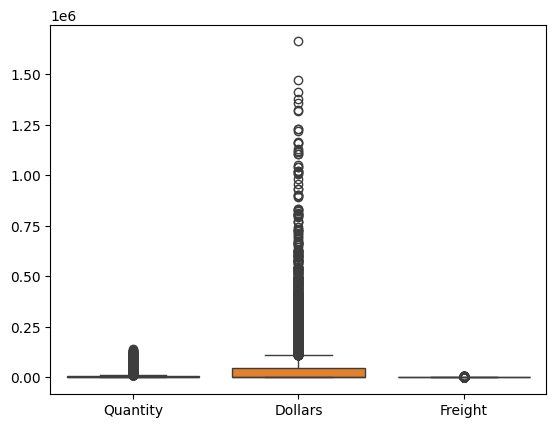

In [526]:
sns.boxplot(data=invoice_purchases[['Quantity', 'Dollars', 'Freight']])


Todo ok pq precisamente quiero hacer analisis temporales

#### analisis de coherencia entre el costo del flete (Freight) y el valor total (Dollars). hay valores de Freight desproporcionadamente altos o bajos?


In [527]:
invoice_purchases['FreightPercentage'] = (invoice_purchases['Freight'] / invoice_purchases['Dollars']) * 100
print(invoice_purchases[['Dollars', 'Freight', 'FreightPercentage']].describe())


            Dollars      Freight  FreightPercentage
count  5.543000e+03  5543.000000        5543.000000
mean   5.807338e+04   295.954301           0.550504
std    1.402340e+05   713.585093           0.480129
min    4.140000e+00     0.020000           0.441628
25%    9.678100e+02     5.020000           0.470298
50%    4.765450e+03    24.730000           0.500003
75%    4.458718e+04   229.660000           0.529997
max    1.660436e+06  8468.220000          11.522531


#### ninguno de esos valores deberia ser 0, evaluo

In [528]:
print(invoice_purchases[(invoice_purchases['Dollars'] == 0) | (invoice_purchases['Freight'] == 0)])


Empty DataFrame
Columns: [VendorNumber, VendorName, InvoiceDate, PONumber, PODate, PayDate, Quantity, Dollars, Freight, FreightPercentage]
Index: []


In [529]:
# Verifica si VendorNumber en invoice_purchases está en vendors
valid_vendors = invoice_purchases['VendorNumber'].isin(purchase_prices['VendorNumber'])

# Filtra registros inconsistentes
inconsistent_vendors = invoice_purchases[~valid_vendors]

print(f"Registros inconsistentes: {len(inconsistent_vendors)}")
print(inconsistent_vendors)


Registros inconsistentes: 1
      VendorNumber                   VendorName InvoiceDate  PONumber  \
3951        201359  FLAVOR ESSENCE INC           2016-10-04     12061   

         PODate    PayDate  Quantity  Dollars  Freight  FreightPercentage  
3951 2016-09-12 2016-11-11         1     17.0     0.09           0.529412  


#### lo borro porque yaaaa

In [532]:
invoice_purchases = invoice_purchases[invoice_purchases['VendorNumber'] != 201359]


In [ ]:

# Crear una clave primaria ficticia combinando columnas existentes
invoice_purchases['InvoicePurchaseID'] = invoice_purchases.index + 1

# Verificar que la clave primaria sea única
print("¿Es 'InvoicePurchaseID' única?", invoice_purchases['InvoicePurchaseID'].is_unique)

# Establecer 'InvoicePurchaseID' como índice (clave primaria)
invoice_purchases.set_index('InvoicePurchaseID', inplace=True)

# Convertir columnas de tipo objeto a string y limpiar los datos
for col in invoice_purchases.select_dtypes(include=['object']).columns:
    invoice_purchases[col] = invoice_purchases[col].astype('string')  # Convertir a string
    invoice_purchases[col] = invoice_purchases[col].str.strip()  # Eliminar espacios al inicio y final
    invoice_purchases[col] = invoice_purchases[col].str.lower()  # Convertir a minúsculas
    invoice_purchases[col] = invoice_purchases[col].str.replace(r'\s+', ' ', regex=True)  # Reemplazar múltiples espacios por uno

# Verificar las primeras filas después de la limpieza
print("Primeras filas después de limpiar las columnas de tipo objeto:")
print(invoice_purchases.head())

# Guardar el DataFrame con la clave primaria
invoice_purchases.to_csv('InvoicePurchases.csv')



¿Es 'InvoicePurchaseID' única? True


### Analisis de BegInventory

In [537]:
beg_inventory = pd.read_csv('BegInvFINAL.csv')
beg_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [538]:
print("Tipos de datos iniciales:")
print(beg_inventory.info())

Tipos de datos iniciales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB
None


In [539]:
# Cambiar tipos de datos
beg_inventory['InventoryId'] = beg_inventory['InventoryId'].astype(str)  # Pasar a string
beg_inventory['City'] = beg_inventory['City'].astype(str).str.strip().str.lower()  # Normalizar string
beg_inventory['Description'] = beg_inventory['Description'].astype(str).str.strip().str.lower()  # Normalizar string
beg_inventory['Size'] = beg_inventory['Size'].astype(str).str.strip().str.lower()  # Normalizar string
beg_inventory['startDate'] = pd.to_datetime(beg_inventory['startDate'], errors='coerce')  # Convertir a fecha

# Establecer InventoryId como índice
beg_inventory.set_index('InventoryId', inplace=True)

# Verificar los cambios realizados
print("Datos después de la transformación:")
print(beg_inventory.info())
print(beg_inventory.head())

# Guardar el DataFrame limpio
beg_inventory.to_csv('BegInv.csv')



Datos después de la transformación:
<class 'pandas.core.frame.DataFrame'>
Index: 206529 entries, 1_HARDERSFIELD_58 to 79_BALLYMENA_90089
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Store        206529 non-null  int64         
 1   City         206529 non-null  object        
 2   Brand        206529 non-null  int64         
 3   Description  206529 non-null  object        
 4   Size         206529 non-null  object        
 5   onHand       206529 non-null  int64         
 6   Price        206529 non-null  float64       
 7   startDate    206529 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 14.2+ MB
None
                   Store          City  Brand                  Description  \
InventoryId                                                                  
1_HARDERSFIELD_58      1  hardersfield     58  gekkeikan black & gold sake   
1_HARDERSF

In [540]:
beg_inventory.head()

,Store,City,Brand,Description,Size,onHand,Price,startDate
InventoryId,,,,,,,,
1_HARDERSFIELD_58,1,hardersfield,58,gekkeikan black & gold sake,750ml,8,12.99,2016-01-01
1_HARDERSFIELD_60,1,hardersfield,60,canadian club 1858 vap,750ml,7,10.99,2016-01-01
1_HARDERSFIELD_62,1,hardersfield,62,herradura silver tequila,750ml,6,36.99,2016-01-01
1_HARDERSFIELD_63,1,hardersfield,63,herradura reposado tequila,750ml,3,38.99,2016-01-01
1_HARDERSFIELD_72,1,hardersfield,72,no. 3 london dry gin,750ml,6,34.99,2016-01-01


In [541]:
# Identificar las filas con valores nulos
nulos = beg_inventory[beg_inventory.isnull().any(axis=1)]

# Mostrar solo los valores nulos (indicando las columnas afectadas)
print("\nFilas con valores nulos:")
print(nulos)




Filas con valores nulos:
Empty DataFrame
Columns: [Store, City, Brand, Description, Size, onHand, Price, startDate]
Index: []


In [542]:
# Excluir la columna índice (ID)
columns_to_analyze = beg_inventory.columns  # Todas las columnas excepto el índice

# Mostrar los valores únicos en cada columna
print("\nValores únicos por columna:")
for column in columns_to_analyze:
    unique_values = beg_inventory[column].unique()
    print(f"{column}: {len(unique_values)} valores únicos")
    print(unique_values[:10])  # Mostrar solo los primeros 10 valores para evitar salidas muy largas
    print("-" * 50)



Valores únicos por columna:
Store: 79 valores únicos
[ 1  2  3  4  5  6  7  8  9 10]
--------------------------------------------------
City: 67 valores únicos
['hardersfield' 'ashborne' 'hornsey' 'eanverness' 'sutton' 'goulcrest'
 'stanmore' 'alnerwick' 'blackpool' 'cardend']
--------------------------------------------------
Brand: 8094 valores únicos
[ 58  60  62  63  72  75  77  79 115 120]
--------------------------------------------------
Description: 7287 valores únicos
['gekkeikan black & gold sake' 'canadian club 1858 vap'
 'herradura silver tequila' 'herradura reposado tequila'
 'no. 3 london dry gin' 'three olives tomato vodka'
 'three olives espresso vodka' 'three olives loopy vodka'
 'belvedere vodka' 'tarantula azul tequila gift']
--------------------------------------------------
Size: 41 valores únicos
['750ml' 'liter' '1.75l' '50ml' '375ml' '50ml 4 pk' '375ml 2 pk'
 '750ml 3 pk' '375ml 3 pk' '750ml + 3/']
--------------------------------------------------
onHand: 474 

startDate: 1 valores únicos
<DatetimeArray>
['2016-01-01 00:00:00']
Length: 1, dtype: datetime64[ns] hay solo un dia?????

In [543]:
# Verificar valores nulos explícitos
print("\nVerificación de valores nulos (NaN):")
print(beg_inventory.isnull().sum())

# Verificar cadenas vacías o espacios en blanco en columnas tipo string
print("\nVerificación de cadenas vacías o espacios en blanco:")
for column in beg_inventory.select_dtypes(include=['object']).columns:
    empty_values = beg_inventory[beg_inventory[column].str.strip() == ""]
    print(f"{column}: {len(empty_values)} filas con cadenas vacías o espacios.")
    if not empty_values.empty:
        print(empty_values)

# Verificar valores específicos que podrían representar datos faltantes
print("\nVerificación de valores sospechosos como -1, 0, 'none':")
suspicious_values = [-1, 0, 'none', 'na', 'n/a', 'null', '']
for column in beg_inventory.columns:
    if beg_inventory[column].dtype == 'object':
        invalid = beg_inventory[beg_inventory[column].str.lower().isin(suspicious_values)]
    else:
        invalid = beg_inventory[beg_inventory[column].isin([-1, 0])]
    print(f"{column}: {len(invalid)} filas con valores sospechosos.")
    if not invalid.empty:
        print(invalid.head())



Verificación de valores nulos (NaN):
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

Verificación de cadenas vacías o espacios en blanco:
City: 0 filas con cadenas vacías o espacios.
Description: 0 filas con cadenas vacías o espacios.
Size: 0 filas con cadenas vacías o espacios.

Verificación de valores sospechosos como -1, 0, 'none':
Store: 0 filas con valores sospechosos.
City: 0 filas con valores sospechosos.
Brand: 0 filas con valores sospechosos.
Description: 0 filas con valores sospechosos.
Size: 0 filas con valores sospechosos.
onHand: 6044 filas con valores sospechosos.
                    Store          City  Brand                  Description  \
InventoryId                                                                   
1_HARDERSFIELD_165      1  hardersfield    165     gentleman jack gift pack   
1_HARDERSFIELD_305      1  hardersfield    305  crown royal canadian whisky

hay dos datos en price con valores raros de 0

In [544]:
# Revisar duplicados
print("\nAnálisis de duplicados:")
duplicated_rows = beg_inventory[beg_inventory.duplicated()]
print(f"Duplicados encontrados: {len(duplicated_rows)}")
if len(duplicated_rows) > 0:
    print(duplicated_rows)


Análisis de duplicados:
Duplicados encontrados: 0


In [545]:
# Analizar valores inconsistentes o anómalos
print("\nAnálisis de inconsistencias:")
# Verificar rangos y valores atípicos
print("Rango de valores en columnas numéricas:")
print(beg_inventory[['Store', 'Brand', 'onHand', 'Price']].describe())



Análisis de inconsistencias:
Rango de valores en columnas numéricas:
               Store          Brand         onHand          Price
count  206529.000000  206529.000000  206529.000000  206529.000000
mean       42.122457   13761.482320      20.429455      22.253910
std        23.191393   13059.429355      31.467342      70.178964
min         1.000000      58.000000       0.000000       0.000000
25%        22.000000    3746.000000       7.000000       9.990000
50%        42.000000    8010.000000      12.000000      14.990000
75%        64.000000   22143.000000      21.000000      21.990000
max        79.000000   90090.000000    1251.000000   13999.900000


In [546]:
# Corregir valores inconsistentes (ejemplo: mayúsculas, espacios, etc.)
beg_inventory['City'] = beg_inventory['City'].str.strip().str.lower()
beg_inventory['Description'] = beg_inventory['Description'].str.strip().str.lower()
beg_inventory['Size'] = beg_inventory['Size'].str.strip().str.lower()


In [547]:

# Revisar fechas
print("\nRevisión de fechas:")
print(beg_inventory['startDate'].describe())
# Eliminar o corregir fechas inválidas si hay errores
beg_inventory['startDate'] = pd.to_datetime(beg_inventory['startDate'], errors='coerce')
beg_inventory = beg_inventory.dropna(subset=['startDate'])



Revisión de fechas:
count                 206529
mean     2016-01-01 00:00:00
min      2016-01-01 00:00:00
25%      2016-01-01 00:00:00
50%      2016-01-01 00:00:00
75%      2016-01-01 00:00:00
max      2016-01-01 00:00:00
Name: startDate, dtype: object


In [548]:

# Validar valores numéricos (ejemplo: precios negativos)
invalid_prices = beg_inventory[beg_inventory['Price'] <= 0]
print("\nRegistros con precios inválidos:")
print(invalid_prices)
beg_inventory = beg_inventory[beg_inventory['Price'] > 0]





Registros con precios inválidos:
                    Store       City  Brand                   Description  \
InventoryId                                                                 
15_WANBORNE_19138      15   wanborne  19138  gerard bertrand organic rose   
69_MOUNTMEND_19138     69  mountmend  19138  gerard bertrand organic rose   

                     Size  onHand  Price  startDate  
InventoryId                                          
15_WANBORNE_19138   750ml       0    0.0 2016-01-01  
69_MOUNTMEND_19138  750ml       2    0.0 2016-01-01  


In [551]:
# Función para procesar la columna 'Size', incluyendo casos específicos problemáticos
def parse_size(size):
    if pd.isnull(size):  # Verificar si el valor es nulo
        return {"size_ml": np.nan, "pack_count": np.nan}  # Retorna valores nulos si el campo es vacío

    size = size.strip().lower()  # Elimina espacios al principio/final y convierte a minúsculas

    # Manejar paquetes, como "100mL 4 Pk"
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l) (\d+) pk", size)
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        pack_count = int(match.group(3))  # Número de botellas en el paquete
        return {"size_ml": unit_size, "pack_count": pack_count}

    # Manejar tamaños con adicionales, como "750mL + 3/"
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)(?: \+ (\d+)/)?", size)
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        additional_count = int(match.group(3)) if match.group(3) else 0  # Ítems adicionales
        return {"size_ml": unit_size, "pack_count": 1 + additional_count}

    # Manejar tamaños con número adicional separado por espacios, como "750mL  3"
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)\s+(\d+)", size)
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        pack_count = int(match.group(3))  # Número adicional
        return {"size_ml": unit_size, "pack_count": pack_count}

    # Manejar tamaños individuales, como "750mL" o "162.5mL"
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)", size)
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        return {"size_ml": unit_size, "pack_count": 1}

    # Manejar otros formatos como onzas u otros
    match = re.match(r"(\d+(?:\.\d+)?)\s?(oz|gal)", size)
    if match:
        unit_size = float(match.group(1))
        if match.group(2) == 'oz':  # Convertir onzas a mililitros
            unit_size *= 29.5735
        elif match.group(2) == 'gal':  # Convertir galones a mililitros
            unit_size *= 3785.41
        return {"size_ml": unit_size, "pack_count": 1}

    # Casos específicos problemáticos
    if size == 'liter':
        return {"size_ml": 1000.0, "pack_count": 1}  # Interpretar un litro como 1000ml
    if size == '3/100ml':
        return {"size_ml": 100.0, "pack_count": 3}  # Interpretar "3/100ml" como tres paquetes de 100ml

    # Retornar valores nulos si el tamaño no coincide con ningún patrón conocido
    return {"size_ml": np.nan, "pack_count": np.nan}

# Aplicar la función parse_size a la columna 'Size'
size_data = beg_inventory['Size'].apply(parse_size)

# Crear nuevas columnas en el DataFrame
beg_inventory['size_ml'] = size_data.apply(lambda x: x['size_ml'])
beg_inventory['pack_count'] = size_data.apply(lambda x: x['pack_count'])

# Verificar las primeras filas para confirmar resultados
print("Primeras filas del DataFrame después de procesar la columna 'Size':")
print(beg_inventory[['Size', 'size_ml', 'pack_count']].head(10))

# Contar valores nulos para evaluar el éxito del procesamiento
print("Valores nulos en las columnas derivadas:")
print(beg_inventory[['size_ml', 'pack_count']].isnull().sum())

# Identificar valores problemáticos restantes
problematic_rows = beg_inventory[beg_inventory['size_ml'].isnull()]
print("Valores problemáticos restantes en la columna 'Size':")
print(problematic_rows['Size'].unique())


Primeras filas del DataFrame después de procesar la columna 'Size':
                     Size  size_ml  pack_count
InventoryId                                   
1_HARDERSFIELD_58   750ml    750.0           1
1_HARDERSFIELD_60   750ml    750.0           1
1_HARDERSFIELD_62   750ml    750.0           1
1_HARDERSFIELD_63   750ml    750.0           1
1_HARDERSFIELD_72   750ml    750.0           1
1_HARDERSFIELD_75   750ml    750.0           1
1_HARDERSFIELD_77   750ml    750.0           1
1_HARDERSFIELD_79   750ml    750.0           1
1_HARDERSFIELD_115  liter   1000.0           1
1_HARDERSFIELD_120  750ml    750.0           1
Valores nulos en las columnas derivadas:
size_ml       0
pack_count    0
dtype: int64
Valores problemáticos restantes en la columna 'Size':
[]


In [552]:
# Convertir el índice 'InventoryId' a minúsculas
beg_inventory.index = beg_inventory.index.str.lower()

# Confirmar el cambio
print("Primeras filas después de convertir el índice a minúsculas:")
print(beg_inventory.head())

# Guardar el DataFrame con 'InventoryId' como índice en un archivo CSV
beg_inventory.to_csv('BegInventory.csv', index=True)



Primeras filas después de convertir el índice a minúsculas:
                   Store          City  Brand                  Description  \
InventoryId                                                                  
1_hardersfield_58      1  hardersfield     58  gekkeikan black & gold sake   
1_hardersfield_60      1  hardersfield     60       canadian club 1858 vap   
1_hardersfield_62      1  hardersfield     62     herradura silver tequila   
1_hardersfield_63      1  hardersfield     63   herradura reposado tequila   
1_hardersfield_72      1  hardersfield     72         no. 3 london dry gin   

                    Size  onHand  Price  startDate  size_ml  pack_count  
InventoryId                                                              
1_hardersfield_58  750ml       8  12.99 2016-01-01    750.0           1  
1_hardersfield_60  750ml       7  10.99 2016-01-01    750.0           1  
1_hardersfield_62  750ml       6  36.99 2016-01-01    750.0           1  
1_hardersfield_63  750m

### Analisis de Purchases

In [559]:
purchases = pd.read_csv('Purchases.csv')
purchases.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [560]:
print("Tipos de datos iniciales:")
print(purchases.info())


Tipos de datos iniciales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB
None


#### Corregir tipo de datos

In [561]:
# Convertir columnas de tipo object a string
object_columns = purchases.select_dtypes(include=['object']).columns
purchases[object_columns] = purchases[object_columns].astype('string')

# Convertir las columnas de fechas a datetime
date_columns = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']
for col in date_columns:
    purchases[col] = pd.to_datetime(purchases[col], errors='coerce')  # Manejar errores con 'coerce'

# Verificar los cambios
print("Tipos de datos después de la conversión:")
print(purchases.dtypes)


Tipos de datos después de la conversión:
InventoryId       string[python]
Store                      int64
Brand                      int64
Description       string[python]
Size              string[python]
VendorNumber               int64
VendorName        string[python]
PONumber                   int64
PODate            datetime64[ns]
ReceivingDate     datetime64[ns]
InvoiceDate       datetime64[ns]
PayDate           datetime64[ns]
PurchasePrice            float64
Quantity                   int64
Dollars                  float64
Classification             int64
dtype: object


In [562]:
# Función para limpiar cadenas de texto
def clean_string(s):
    if pd.isnull(s):  # Si es nulo, lo devuelve tal cual
        return s
    # Eliminar acentos y normalizar el texto
    s = unicodedata.normalize('NFKD', s).encode('ascii', 'ignore').decode('utf-8')
    # Convertir a minúsculas, quitar espacios al inicio/final y reemplazar múltiples espacios
    return ' '.join(s.strip().lower().split())

# Seleccionar columnas de tipo string
string_columns = purchases.select_dtypes(include=['string']).columns

# Aplicar la limpieza a las columnas string
for col in string_columns:
    purchases[col] = purchases[col].apply(clean_string)

# Verificar los resultados
print("Primeras filas después de limpiar las columnas string:")
print(purchases.head())

# Verificar los tipos de datos
print("Tipos de datos después de la limpieza:")
print(purchases.dtypes)


Primeras filas después de limpiar las columnas string:
           InventoryId  Store  Brand                   Description   Size  \
0    69_mountmend_8412     69   8412     tequila ocho plata fresno  750ml   
1     30_culcheth_5255     30   5255  tgi fridays ultimte mudslide  1.75l   
2    34_pitmerden_5215     34   5215  tgi fridays long island iced  1.75l   
3  1_hardersfield_5255      1   5255  tgi fridays ultimte mudslide  1.75l   
4    76_doncaster_2034     76   2034     glendalough double barrel  750ml   

   VendorNumber                  VendorName  PONumber     PODate  \
0           105          altamar brands llc      8124 2015-12-21   
1          4466   american vintage beverage      8137 2015-12-22   
2          4466   american vintage beverage      8137 2015-12-22   
3          4466   american vintage beverage      8137 2015-12-22   
4           388  atlantic importing company      8169 2015-12-24   

  ReceivingDate InvoiceDate    PayDate  PurchasePrice  Quantity  Dollars 

#### Analisis de nulos

In [566]:
print("Valores nulos por columna:")
print(purchases.isnull().sum())


Valores nulos por columna:
InventoryId       0
Store             0
Brand             0
Description       0
Size              0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [564]:
purchases = purchases.dropna(subset=['Size'])


#### Analisis de duplicados

In [565]:
print("Duplicados detectados:")
print(purchases.duplicated().sum())


Duplicados detectados:
0


#### Validar consistencia de fechas

In [567]:
# Revisar si las fechas tienen inconsistencias lógicas
inconsistent_dates = purchases[(purchases['PODate'] > purchases['InvoiceDate']) | 
                                (purchases['InvoiceDate'] > purchases['PayDate'])]
print("Fechas inconsistentes detectadas:")
print(inconsistent_dates)

Fechas inconsistentes detectadas:
Empty DataFrame
Columns: [InventoryId, Store, Brand, Description, Size, VendorNumber, VendorName, PONumber, PODate, ReceivingDate, InvoiceDate, PayDate, PurchasePrice, Quantity, Dollars, Classification]
Index: []


In [568]:
# #### Buscar valores fuera de rango

print("Filas con valores negativos en Quantity:")
print(purchases[purchases['Quantity'] < 0])

# %%
print("Filas con valores negativos en Dollars:")
print(purchases[(purchases['Dollars'] < 0)])


Filas con valores negativos en Quantity:
Empty DataFrame
Columns: [InventoryId, Store, Brand, Description, Size, VendorNumber, VendorName, PONumber, PODate, ReceivingDate, InvoiceDate, PayDate, PurchasePrice, Quantity, Dollars, Classification]
Index: []
Filas con valores negativos en Dollars:
Empty DataFrame
Columns: [InventoryId, Store, Brand, Description, Size, VendorNumber, VendorName, PONumber, PODate, ReceivingDate, InvoiceDate, PayDate, PurchasePrice, Quantity, Dollars, Classification]
Index: []


#### Verificar si VendorNumber en purchases está en purchase_prices


In [569]:
valid_vendors = purchases['VendorNumber'].isin(purchasePrices['VendorNumber'])


In [570]:
# Filtrar registros inconsistentes
inconsistent_vendors = purchases[~valid_vendors]
print(f"Registros inconsistentes: {len(inconsistent_vendors)}")
print(inconsistent_vendors)

Registros inconsistentes: 1
                 InventoryId  Store  Brand                   Description  \
1659444  67_eanverness_90609     67  90609  flavor essence variety 5 pak   

           Size  VendorNumber          VendorName  PONumber     PODate  \
1659444  5/2 oz        201359  flavor essence inc     12061 2016-09-12   

        ReceivingDate InvoiceDate    PayDate  PurchasePrice  Quantity  \
1659444    2016-09-25  2016-10-04 2016-11-11           17.0         1   

         Dollars  Classification  
1659444     17.0               2  


In [571]:
# Verificar el registro inconsistente antes de eliminarlo
registro_inconsistente = purchases[purchases['InventoryId'] == '67_eanverness_90609']
print("\nRegistro inconsistente encontrado:")
print(registro_inconsistente)

# Eliminar el registro inconsistente
purchases_cleaned = purchases[purchases['InventoryId'] != '67_eanverness_90609']

# Verificar que el registro fue eliminado
print("\nRegistros restantes después de eliminar el inconsistente:")
print(purchases_cleaned[purchases_cleaned['InventoryId'] == '67_eanverness_90609'])

# Guardar la tabla limpia
purchases_cleaned.to_csv('Purchases', index=False)




Registro inconsistente encontrado:
                 InventoryId  Store  Brand                   Description  \
631124   67_eanverness_90609     67  90609  flavor essence variety 5 pak   
1659444  67_eanverness_90609     67  90609  flavor essence variety 5 pak   

           Size  VendorNumber                     VendorName  PONumber  \
631124   5/2 oz             2  ira goldman and williams, llp      9855   
1659444  5/2 oz        201359             flavor essence inc     12061   

            PODate ReceivingDate InvoiceDate    PayDate  PurchasePrice  \
631124  2016-04-19    2016-04-29  2016-05-09 2016-06-08           17.0   
1659444 2016-09-12    2016-09-25  2016-10-04 2016-11-11           17.0   

         Quantity  Dollars  Classification  
631124         32    544.0               2  
1659444         1     17.0               2  

Registros restantes después de eliminar el inconsistente:
Empty DataFrame
Columns: [InventoryId, Store, Brand, Description, Size, VendorNumber, VendorNam

NO SE DE DONDE SALE

In [577]:
# Función actualizada para procesar la columna 'Size'
def parse_size(size):
    if pd.isnull(size):  # Verificar si el valor es nulo
        return {"size_ml": np.nan, "pack_count": np.nan}  # Retorna valores nulos si el campo es vacío

    size = size.strip().lower()  # Elimina espacios al principio/final y convierte a minúsculas

    # Manejar paquetes, como "100mL 4 Pk"
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l) (\d+) pk", size)
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        pack_count = int(match.group(3))  # Número de botellas en el paquete
        return {"size_ml": unit_size, "pack_count": pack_count}

    # Manejar tamaños con adicionales, como "750mL + 3/"
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)(?: \+ (\d+)/)?", size)
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        additional_count = int(match.group(3)) if match.group(3) else 0  # Ítems adicionales
        return {"size_ml": unit_size, "pack_count": 1 + additional_count}

    # Manejar tamaños con número adicional separado por espacios, como "750mL  3"
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)\s+(\d+)", size)
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        pack_count = int(match.group(3))  # Número adicional
        return {"size_ml": unit_size, "pack_count": pack_count}

    # Manejar tamaños individuales, como "750mL" o "162.5mL"
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)", size)
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        return {"size_ml": unit_size, "pack_count": 1}

    # Manejar otros formatos como onzas u otros
    match = re.match(r"(\d+(?:\.\d+)?)\s?(oz|gal)", size)
    if match:
        unit_size = float(match.group(1))
        if match.group(2) == 'oz':  # Convertir onzas a mililitros
            unit_size *= 29.5735
        elif match.group(2) == 'gal':  # Convertir galones a mililitros
            unit_size *= 3785.41
        return {"size_ml": unit_size, "pack_count": 1}

    # Casos específicos problemáticos
    if size == 'liter':
        return {"size_ml": 1000.0, "pack_count": 1}  # Interpretar "liter" como 1000ml
    if size == '3/100ml':
        return {"size_ml": 100.0, "pack_count": 3}  # Interpretar "3/100ml" como 3 paquetes de 100ml
    if size == '5/2 oz':
        return {"size_ml": 59.147 * 5, "pack_count": 1}  # Convertir 5 porciones de 2oz a ml
    if size == '25.0':
        return {"size_ml": 25.0, "pack_count": 1}  # Interpretar "25.0" como 25ml

    # Retornar valores nulos si el tamaño no coincide con ningún patrón conocido
    return {"size_ml": np.nan, "pack_count": np.nan}

# Reaplicar la función parse_size a la columna 'Size'
size_data = purchases['Size'].apply(parse_size)

# Crear nuevas columnas en el DataFrame
purchases['size_ml'] = size_data.apply(lambda x: x['size_ml'])
purchases['pack_count'] = size_data.apply(lambda x: x['pack_count'])

# Verificar las primeras filas para confirmar resultados
print("Primeras filas del DataFrame después de procesar la columna 'Size':")
print(purchases[['Size', 'size_ml', 'pack_count']].head(10))

# Contar valores nulos para evaluar el éxito del procesamiento
print("Valores nulos en las columnas derivadas:")
print(purchases[['size_ml', 'pack_count']].isnull().sum())

# Identificar valores problemáticos restantes
problematic_rows = purchases[purchases['size_ml'].isnull()]
print("Valores problemáticos restantes en la columna 'Size':")
print(problematic_rows['Size'].unique())


Primeras filas del DataFrame después de procesar la columna 'Size':
    Size  size_ml  pack_count
0  750ml    750.0           1
1  1.75l   1750.0           1
2  1.75l   1750.0           1
3  1.75l   1750.0           1
4  750ml    750.0           1
5  1.75l   1750.0           1
6  750ml    750.0           1
7  200ml    200.0           1
8  750ml    750.0           1
9  1.75l   1750.0           1
Valores nulos en las columnas derivadas:
size_ml       0
pack_count    0
dtype: int64
Valores problemáticos restantes en la columna 'Size':
[]


In [578]:
purchases.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,size_ml,pack_count
0,69_mountmend_8412,69,8412,tequila ocho plata fresno,750ml,105,altamar brands llc,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,750.0,1
1,30_culcheth_5255,30,5255,tgi fridays ultimte mudslide,1.75l,4466,american vintage beverage,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,1750.0,1
2,34_pitmerden_5215,34,5215,tgi fridays long island iced,1.75l,4466,american vintage beverage,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,1750.0,1
3,1_hardersfield_5255,1,5255,tgi fridays ultimte mudslide,1.75l,4466,american vintage beverage,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,1750.0,1
4,76_doncaster_2034,76,2034,glendalough double barrel,750ml,388,atlantic importing company,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,750.0,1


In [579]:
# Crear PurchaseID basado en columnas clave
purchases['PurchaseID'] = purchases['InventoryId'] + '_' + purchases['VendorNumber'].astype(str) + '_' + purchases['PONumber'].astype(str)

# Verificar el resultado
print(purchases[['PurchaseID', 'InventoryId', 'VendorNumber', 'PONumber']].head())


                      PurchaseID          InventoryId  VendorNumber  PONumber
0     69_mountmend_8412_105_8124    69_mountmend_8412           105      8124
1     30_culcheth_5255_4466_8137     30_culcheth_5255          4466      8137
2    34_pitmerden_5215_4466_8137    34_pitmerden_5215          4466      8137
3  1_hardersfield_5255_4466_8137  1_hardersfield_5255          4466      8137
4     76_doncaster_2034_388_8169    76_doncaster_2034           388      8169


In [580]:
# Establecer PurchaseID como índice
purchases.set_index('PurchaseID', inplace=True)

# Verificar el índice
print(purchases.head())


                                       InventoryId  Store  Brand  \
PurchaseID                                                         
69_mountmend_8412_105_8124       69_mountmend_8412     69   8412   
30_culcheth_5255_4466_8137        30_culcheth_5255     30   5255   
34_pitmerden_5215_4466_8137      34_pitmerden_5215     34   5215   
1_hardersfield_5255_4466_8137  1_hardersfield_5255      1   5255   
76_doncaster_2034_388_8169       76_doncaster_2034     76   2034   

                                                Description   Size  \
PurchaseID                                                           
69_mountmend_8412_105_8124        tequila ocho plata fresno  750ml   
30_culcheth_5255_4466_8137     tgi fridays ultimte mudslide  1.75l   
34_pitmerden_5215_4466_8137    tgi fridays long island iced  1.75l   
1_hardersfield_5255_4466_8137  tgi fridays ultimte mudslide  1.75l   
76_doncaster_2034_388_8169        glendalough double barrel  750ml   

                               V

In [582]:
# Guardar el DataFrame con PurchaseID
purchases.to_csv('Purchases.csv', index=True)


### Analisis de tabla Sales

In [583]:
sales=pd.read_csv('Sales.csv')
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


#### Borrar columnas innecesarias

In [584]:

# Función para limpiar y normalizar cadenas de texto
def clean_string(value):
    if pd.isnull(value):  # Si el valor es nulo, lo retorna tal cual
        return value
    # Normalizar texto para eliminar acentos y caracteres especiales
    value = unicodedata.normalize('NFKD', value).encode('ascii', 'ignore').decode('utf-8')
    # Convertir a minúsculas, eliminar espacios extra y quitar espacios al inicio y final
    return ' '.join(value.strip().lower().split())

# Asegurar que InventoryId sea string
sales['InventoryId'] = sales['InventoryId'].astype('string')

# Aplicar limpieza a todas las columnas de tipo string
string_columns = sales.select_dtypes(include=['string']).columns
for col in string_columns:
    sales[col] = sales[col].apply(clean_string)

# Renombrar columnas según lo solicitado
sales.rename(columns={
    'VendorNo': 'VendorNumber',
    'Volume': 'size_ml',
    'SalesDate': 'SalesDate'
}, inplace=True)

# Convertir SalesDate a formato datetime
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'], errors='coerce')

# Crear la columna índice SalesID
sales['SalesID'] = range(1, len(sales) + 1)

# Mover SalesID al inicio del DataFrame
sales = sales[['SalesID'] + [col for col in sales.columns if col != 'SalesID']]

# Verificar los cambios realizados
print("Tipos de datos después de las modificaciones:")
print(sales.dtypes)

print("Primeras filas del DataFrame modificado:")
print(sales.head())


Tipos de datos después de las modificaciones:
SalesID                    int64
InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
SalesQuantity              int64
SalesDollars             float64
SalesPrice               float64
SalesDate         datetime64[ns]
size_ml                    int64
Classification             int64
ExciseTax                float64
VendorNumber               int64
VendorName                object
dtype: object
Primeras filas del DataFrame modificado:
   SalesID          InventoryId  Store  Brand                 Description  \
0        1  1_hardersfield_1004      1   1004  Jim Beam w/2 Rocks Glasses   
1        2  1_hardersfield_1004      1   1004  Jim Beam w/2 Rocks Glasses   
2        3  1_hardersfield_1004      1   1004  Jim Beam w/2 Rocks Glasses   
3        4  1_hardersfield_1004      1   1004  Jim Beam w/2 Rocks Glasses   
4        5  1_harde

In [586]:
# Verificar valores nulos en toda la tabla
print("Valores nulos por columna:")
print(sales.isnull().sum())


Valores nulos por columna:
SalesID           0
InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
size_ml           0
Classification    0
ExciseTax         0
VendorNumber      0
VendorName        0
dtype: int64


In [587]:
# Verificar si hay fechas futuras
future_dates = sales[sales['SalesDate'] > pd.Timestamp.today()]
print(f"Filas con fechas futuras: {len(future_dates)}")


Filas con fechas futuras: 0


In [588]:
# Resumen estadístico para detectar outliers
print(sales[['SalesQuantity', 'SalesDollars', 'SalesPrice', 'ExciseTax']].describe())

# Verificar valores negativos en columnas que no deberían tenerlos
negative_values = sales[(sales['SalesQuantity'] < 0) | (sales['SalesDollars'] < 0) | (sales['SalesPrice'] < 0)]
print(f"Filas con valores negativos: {len(negative_values)}")


       SalesQuantity  SalesDollars    SalesPrice     ExciseTax
count   1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06
mean    2.337619e+00  3.160420e+01  1.543162e+01  1.326847e+00
std     3.511492e+00  6.570249e+01  1.404967e+01  3.407898e+00
min     1.000000e+00  4.900000e-01  4.900000e-01  1.000000e-02
25%     1.000000e+00  1.099000e+01  8.990000e+00  1.600000e-01
50%     1.000000e+00  1.799000e+01  1.299000e+01  6.800000e-01
75%     2.000000e+00  3.199000e+01  1.899000e+01  1.570000e+00
max     4.320000e+02  1.327997e+04  4.999990e+03  3.785200e+02
Filas con valores negativos: 0


In [589]:
# Validar coherencia entre SalesDollars y SalesQuantity * SalesPrice
sales['CalculatedSalesDollars'] = sales['SalesQuantity'] * sales['SalesPrice']
inconsistencies = sales[sales['SalesDollars'] != sales['CalculatedSalesDollars']]
print(f"Filas con inconsistencias en SalesDollars: {len(inconsistencies)}")


Filas con inconsistencias en SalesDollars: 26018


In [590]:
# Ver las primeras filas con inconsistencias
print(sales[sales['SalesDollars'] != sales['CalculatedSalesDollars']].head(10))

# Estadísticas descriptivas de las inconsistencias
print(sales[sales['SalesDollars'] != sales['CalculatedSalesDollars']][['SalesDollars', 'CalculatedSalesDollars']].describe())


     SalesID           InventoryId  Store  Brand              Description  \
293      294  1_hardersfield_11213      1  11213            Meiomi Pnt Nr   
648      649   1_hardersfield_1232      1   1232  Jack Daniels No 7 Black   
651      652   1_hardersfield_1232      1   1232  Jack Daniels No 7 Black   
654      655   1_hardersfield_1232      1   1232  Jack Daniels No 7 Black   
661      662   1_hardersfield_1232      1   1232  Jack Daniels No 7 Black   
667      668   1_hardersfield_1233      1   1233  Jack Daniels No 7 Black   
671      672   1_hardersfield_1233      1   1233  Jack Daniels No 7 Black   
673      674   1_hardersfield_1233      1   1233  Jack Daniels No 7 Black   
676      677   1_hardersfield_1233      1   1233  Jack Daniels No 7 Black   
684      685   1_hardersfield_1233      1   1233  Jack Daniels No 7 Black   

      Size  SalesQuantity  SalesDollars  SalesPrice  SalesDate  size_ml  \
293  750mL              5        109.95       21.99 2016-01-27      750   
64

esta todo ok

In [591]:
# Definir un umbral de tolerancia para las diferencias flotantes
epsilon = 1e-9

# Verificar si hay diferencias reales dentro del umbral
inconsistencies = sales[abs(sales['SalesDollars'] - sales['CalculatedSalesDollars']) > epsilon]

# Mostrar la cantidad de filas con diferencias reales
print(f"Filas con diferencias reales: {len(inconsistencies)}")
print(inconsistencies.head(10))


Filas con diferencias reales: 0
Empty DataFrame
Columns: [SalesID, InventoryId, Store, Brand, Description, Size, SalesQuantity, SalesDollars, SalesPrice, SalesDate, size_ml, Classification, ExciseTax, VendorNumber, VendorName, CalculatedSalesDollars]
Index: []


2. Ajustar los Valores si las Diferencias Son Insignificantes
Si las diferencias son menores que un umbral razonable (por ejemplo, epsilon), ajusta SalesDollars para que coincida con CalculatedSalesDollars:

In [592]:
# Ajustar filas con diferencias menores al umbral
sales.loc[abs(sales['SalesDollars'] - sales['CalculatedSalesDollars']) <= epsilon, 'SalesDollars'] = sales['CalculatedSalesDollars']

# Verificar nuevamente las inconsistencias
remaining_inconsistencies = sales[sales['SalesDollars'] != sales['CalculatedSalesDollars']]
print(f"Inconsistencias restantes después del ajuste: {len(remaining_inconsistencies)}")


Inconsistencias restantes después del ajuste: 0


In [593]:
# Identificar duplicados
duplicates = sales.duplicated()
print(f"Filas duplicadas: {duplicates.sum()}")

# Eliminar duplicados si los hay
sales = sales.drop_duplicates()


Filas duplicadas: 0


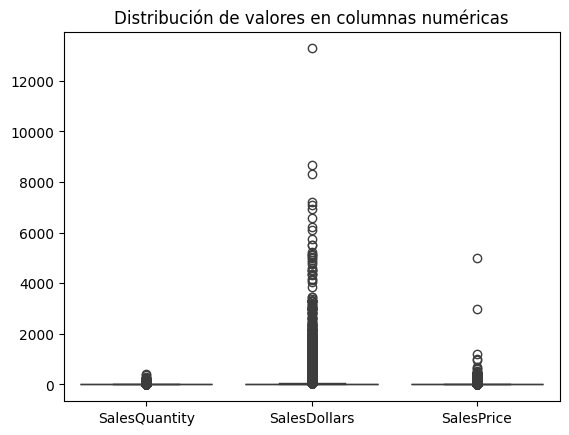

In [594]:

# Visualizar outliers con boxplot
sns.boxplot(data=sales[['SalesQuantity', 'SalesDollars', 'SalesPrice']])
plt.title("Distribución de valores en columnas numéricas")
plt.show()


In [595]:
# Verificar valores únicos en size_ml
print(sales['size_ml'].unique())


[  750   375    50   200  1500  5000  1000   100  1750  3000   187   500
   250   300  4000   150   720   330   650   180 18000 20000]


In [596]:
# Guardar el DataFrame limpio
sales.to_csv('Sales.csv', index=False)


### Analisis de EndInventory

In [597]:
end_inventory=pd.read_csv('EndInv.csv')
end_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [598]:
# Convertir a minúsculas y eliminar espacios en columnas de texto
columns_to_clean = ['InventoryId', 'City', 'Description', 'Size']
for col in columns_to_clean:
    end_inventory[col] = end_inventory[col].str.strip().str.lower()

# Convertir endDate al tipo datetime
end_inventory['endDate'] = pd.to_datetime(end_inventory['endDate'], errors='coerce')

# Verificar y manejar valores nulos
end_inventory['Size'] = end_inventory['Size'].fillna('unknown')
end_inventory['City'] = end_inventory['City'].fillna('unknown')
end_inventory['Price'] = end_inventory['Price'].replace(0, np.nan)

# Eliminar filas con valores nulos críticos (Price, endDate)
end_inventory = end_inventory.dropna(subset=['Price', 'endDate'])

# Revisar valores numéricos sospechosos en Price y onHand
end_inventory = end_inventory[end_inventory['Price'] > 0]
end_inventory = end_inventory[end_inventory['onHand'] >= 0]

# Eliminar duplicados
end_inventory = end_inventory.drop_duplicates()


In [599]:

# Definir la función para procesar la columna 'Size'
def parse_size(size):
    if pd.isnull(size):  # Verificar si el valor es nulo
        return {"size_ml": np.nan, "pack_count": np.nan}  # Retorna valores nulos si el campo es vacío
    
    size = size.strip().lower()  # Elimina espacios al principio/final y convierte a minúsculas

    #################################################################################################
    # Manejar paquetes, como "100mL 4 Pk"
    #################################################################################################
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l) (\d+) pk", size)  # Buscar coincidencias con regex
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        pack_count = int(match.group(3))  # Número de botellas en el paquete
        return {"size_ml": unit_size, "pack_count": pack_count}

    #################################################################################################
    # Manejar tamaños con adicionales, como "750mL + 3/"
    #################################################################################################
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)(?: \+ (\d+)/)?", size)  # Buscar coincidencias con regex para valores con +
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        additional_count = int(match.group(3)) if match.group(3) else 0  # Ítems adicionales
        return {"size_ml": unit_size, "pack_count": 1 + additional_count}

    #################################################################################################
    # Manejar tamaños con número adicional separado por espacios, como "750mL  3"
    #################################################################################################
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)\s+(\d+)", size)  # Buscar coincidencias con espacios adicionales
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        pack_count = int(match.group(3))  # Número adicional
        return {"size_ml": unit_size, "pack_count": pack_count}

    #################################################################################################
    # Manejar tamaños individuales, como "750mL" o "162.5mL"
    #################################################################################################
    match = re.match(r"(\d+(?:\.\d+)?)(ml|l)", size)  # Busca tamaños individuales
    if match:
        unit_size = float(match.group(1))  # Tamaño individual
        if match.group(2) == 'l':  # Convertir litros a mililitros
            unit_size *= 1000
        return {"size_ml": unit_size, "pack_count": 1}

    #################################################################################################
    # Retornar valores nulos si el tamaño no coincide con ningún patrón conocido
    #################################################################################################
    return {"size_ml": np.nan, "pack_count": np.nan}

# Aplicar la función parse_size a la columna 'Size' en end_inventory
size_data = end_inventory['Size'].apply(parse_size)

# Crear nuevas columnas en el DataFrame
end_inventory['size_ml'] = size_data.apply(lambda x: x['size_ml'])
end_inventory['pack_count'] = size_data.apply(lambda x: x['pack_count'])

# Verificar las primeras filas para confirmar resultados
print("Primeras filas del DataFrame después de procesar la columna 'Size':")
print(end_inventory[['Size', 'size_ml', 'pack_count']].head(10))

# Contar valores nulos para evaluar el éxito del procesamiento
print("Valores nulos en las columnas derivadas:")
print(end_inventory[['size_ml', 'pack_count']].isnull().sum())

# Identificar valores problemáticos
problematic_rows = end_inventory[end_inventory['size_ml'].isnull()]
print("Valores problemáticos en la columna 'Size':")
print(problematic_rows['Size'].unique())


Primeras filas del DataFrame después de procesar la columna 'Size':
         Size  size_ml  pack_count
0       750ml    750.0         1.0
1       750ml    750.0         1.0
2       750ml    750.0         1.0
3       750ml    750.0         1.0
4       750ml    750.0         1.0
5       750ml    750.0         1.0
6       750ml    750.0         1.0
7       liter      NaN         NaN
8       liter      NaN         NaN
9  750ml + 2/    750.0         3.0
Valores nulos en las columnas derivadas:
size_ml       3867
pack_count    3867
dtype: int64
Valores problemáticos en la columna 'Size':
['liter' '3/100ml' '5.0 oz' '5/2 oz' '25.0' '128.0 gal']


In [600]:
# Función para manejar valores problemáticos
def handle_problematic_size(size):
    if size == 'liter':
        return {"size_ml": 1000, "pack_count": 1}
    elif size == '3/100ml':
        return {"size_ml": 100, "pack_count": 3}
    elif size == '5.0 oz':
        return {"size_ml": 5.0 * 29.5735, "pack_count": 1}
    elif size == '5/2 oz':
        return {"size_ml": 2 * 29.5735, "pack_count": 5}
    elif size == '25.0':
        return {"size_ml": np.nan, "pack_count": np.nan}  # Sin contexto, se deja como NaN
    elif size == '128.0 gal':
        return {"size_ml": 128.0 * 3785.41, "pack_count": 1}
    else:
        return {"size_ml": np.nan, "pack_count": np.nan}  # Valores no reconocidos

# Aplicar la función a los valores problemáticos
problematic_indices = end_inventory[end_inventory['Size'].isin(['liter', '3/100ml', '5.0 oz', '5/2 oz', '25.0', '128.0 gal'])].index
corrected_sizes = end_inventory.loc[problematic_indices, 'Size'].apply(handle_problematic_size)

# Actualizar las columnas size_ml y pack_count para estos valores
end_inventory.loc[problematic_indices, 'size_ml'] = corrected_sizes.apply(lambda x: x['size_ml'])
end_inventory.loc[problematic_indices, 'pack_count'] = corrected_sizes.apply(lambda x: x['pack_count'])

# Verificar los cambios
print("Valores actualizados para los casos problemáticos:")
print(end_inventory.loc[problematic_indices, ['Size', 'size_ml', 'pack_count']])


Valores actualizados para los casos problemáticos:
         Size  size_ml  pack_count
7       liter   1000.0         1.0
8       liter   1000.0         1.0
17      liter   1000.0         1.0
18      liter   1000.0         1.0
24      liter   1000.0         1.0
...       ...      ...         ...
222159  liter   1000.0         1.0
222371  liter   1000.0         1.0
222373  liter   1000.0         1.0
223507  liter   1000.0         1.0
223776  liter   1000.0         1.0

[3867 rows x 3 columns]


In [602]:
# Guardar el DataFrame en un archivo CSV
end_inventory.to_csv('endInventory.csv', index=False)

